In [20]:
# 1. 数据下载和载入
'''
from shutil import copyfileobj
from six.moves import urllib
from sklearn.datasets.base import get_data_home
import os

def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = get_data_home(data_home=data_home)
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)
            
fetch_mnist()
'''
from sklearn.datasets.base import get_data_home 
print (get_data_home())

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

mnist

C:\Users\xusy\scikit_learn_data


c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [37]:
X, y = mnist["data"], mnist["target"]

print(X.shape)

print(y.shape)

(70000, 784)
(70000,)


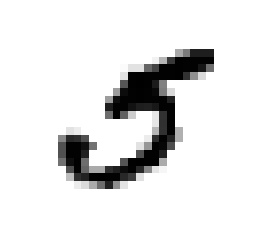

5.0


In [19]:
# 1.1 数据图片展示
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_dight = X[36000]
some_dight_image = some_dight.reshape(28,28)

plt.imshow(some_dight_image, cmap=matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()
print(y[36000])

In [47]:
# 1.2 数据划分
from sklearn.model_selection import StratifiedShuffleSplit
mysplit = StratifiedShuffleSplit(n_splits=1, test_size=1.0/7, random_state=42)

for train_index, test_index in mysplit.split(X, y):
    train_set = X[train_index]
    train_label_set = y[train_index]
    test_set = X[test_index]
    test_label_set = y[test_index]


print(train_set.shape)
print(test_set.shape)

import pandas as pd
df_test = pd.DataFrame(test_label_set,columns=['label'])
df_train = pd.DataFrame(train_label_set,columns=['label'])

print("train:\n",df_train["label"].value_counts()/len(df_train))
print("test:\n",df_test["label"].value_counts()/len(df_test))


In [70]:

# 2. 训练分类器
y_train_5 = (train_label_set == 5)
y_test_5 = (test_label_set == 5)
X_train = train_set.copy()
X_test = test_set.copy()
# 2.1 训练单个分类器 数字5， 采用随机梯度下降分类器
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_dight])

In [73]:
# 3. 交叉验证
# 3.1 实现交叉验证
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))
    
                           

c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.967451627419


c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9669


c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.964498224911


In [74]:
# 3.2 使用交叉验证
from sklearn.model_selection import cross_val_score

sgd_score = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(sgd_score) 

c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

[ 0.96745163  0.9669      0.96449822]


In [75]:
# 对于skewed dataset，偏度较大数据类别不均衡的特殊情况
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train, y_train_5,cv = 3,scoring="accuracy")

array([ 0.90935,  0.91135,  0.90875])

In [76]:
# 采用混淆矩阵来评估分类
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\xusy\anaconda3\envs\har\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

In [77]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_5, y_train_pred))

[[53741   848]
 [ 1175  4236]]
